機械学習特論 第7回 クラスタリングを利用した予測

In [3]:
# google colab で実行する場合は、次の行の先頭の # を削除してこのブロックを実行する
#!pip install japanize-matplotlib
#!pip install pyclustering
# opencv インストール
#!pip install opencv-python
# サンプル画像を入手
#!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/fruits.jpg

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import cv2

In [8]:
# sklearnデータセットに収録されたiris(アヤメ)のデータセットをロード
from sklearn.datasets import load_iris
iris_data = load_iris()

# 学習用データのデータフレームを作成
x = pd.DataFrame(iris_data["data"],columns=iris_data["feature_names"])
y = pd.DataFrame(iris_data["target"],columns=["target"])
plot_data = x.copy()
plot_data['species'] = y

In [9]:
# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

x_train:112 x_test:38 y_train:112 y_test:38


[train] クラスターと品種が一致: 99 (0.8839285714285714)
[test] クラスターと品種が一致: 35 (0.9210526315789473)


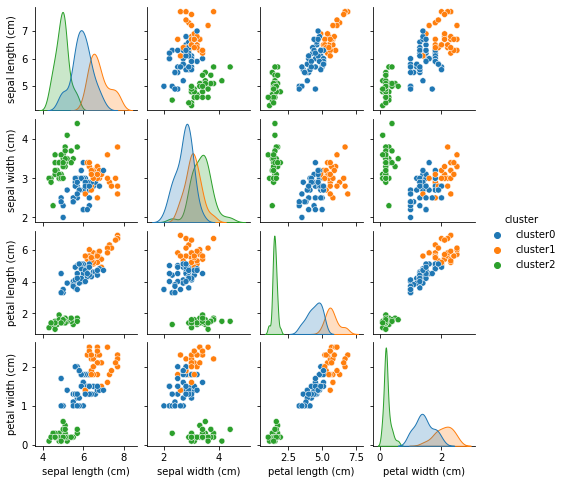

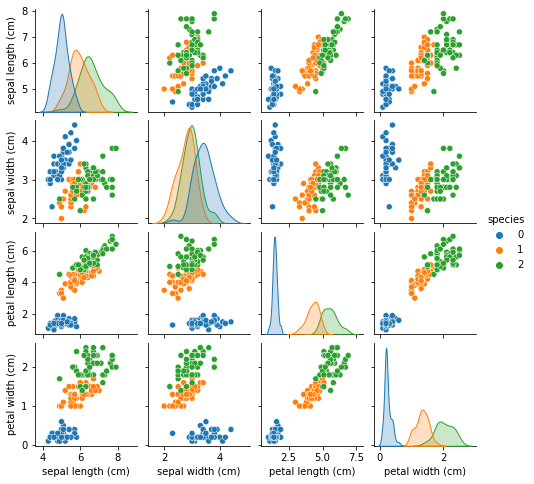

In [14]:
# kmeans法を実行
kmeans = KMeans(n_clusters=3, max_iter=30, init="random", random_state=1)
kmeans.fit(x_train)
train_cluster = kmeans.predict(x_train)
test_cluster = kmeans.predict(x_test)

# 結果を確認 (品種とクラスター番号の紐づけは結果を確認して実施)
correct = 0
for _y, _pred in zip(y_train['target'], train_cluster):
    if (_y == 0 and _pred == 2) or (_y == 1 and _pred == 0) or (_y == 2 and _pred == 1):
        correct = correct + 1  
print('[train] クラスターと品種が一致:', correct, f'({correct/len(y_train)})')
correct = 0
for _y, _pred in zip(y_test['target'], test_cluster):
    if (_y == 0 and _pred == 2) or (_y == 1 and _pred == 0) or (_y == 2 and _pred == 1):
        correct = correct + 1  
print('[test] クラスターと品種が一致:', correct, f'({correct/len(y_test)})')

# ペアプロットで結果を確認
kmeans_result = x_train.copy()
kmeans_result["cluster"] = ["cluster"+str(_x_train) for _x_train in train_cluster]
sns.pairplot(kmeans_result, hue='cluster', height=1.7)
sns.pairplot(plot_data, hue='species', palette='tab10', height=1.7)

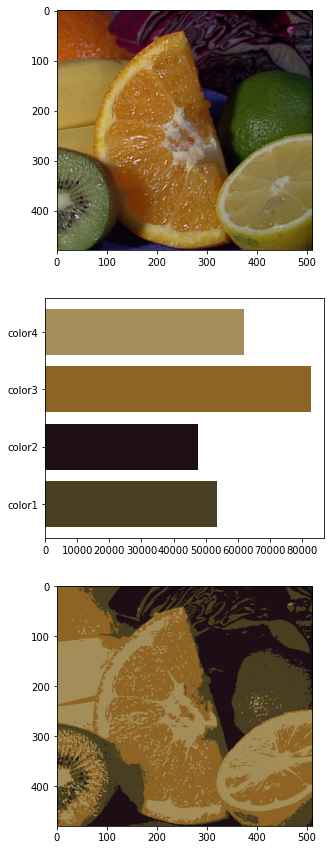

In [33]:
# サンプル画像を読込み、
from sklearn.cluster import KMeans
import cv2
img = cv2.imread('fruits.jpg') # 画像ファイルを読み込む
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR形式の画像をRGB形式に変換
img_flat = img.reshape(-1,3) # 3バンドの画像をアレイ形式に変換

# 画像中の色をクラスタリング
k = 4
kmeans = KMeans(n_clusters=k, max_iter=30, init="random", random_state=1)
kmeans.fit(img_flat) 
img_res = kmeans.predict(img_flat) # 画像中の画素の色がどのクラスタに属するか計算
_, counts = np.unique(img_res, axis=0, return_counts=True) # 各クラスタに属する画素数を確認
bar_color = kmeans.cluster_centers_[:] / 255 # 棒グラフの色用に0-255を0-1に変換
bar_text = []
for i in range(k):
    bar_text.append(f'color{i+1}') # 棒グラフのラベルを準備
# 画像中の色を各クラスタの中心の色に置換
img_res = kmeans.cluster_centers_[img_res].reshape(img.shape).astype(np.int64)

# 結果を表示
fig, ax = plt.subplots(3, 1, figsize=(5,15))
ax[0].imshow(img)
ax[1].barh(np.arange(k), counts, color=bar_color, tick_label=bar_text)
ax[2].imshow(img_res)
plt.show()